In [22]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [23]:
data=pd.read_csv("/content/cumulative_2025.10.05_08.07.43.csv")

In [24]:
# Check the shape and first few rows
print("Data shape:", data.shape)
data.head()

Data shape: (9564, 49)


,kepoi_name,kepid,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,K00752.01,10797460,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,K00752.02,10797460,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,K00753.01,10811496,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,K00754.01,10848459,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,K00755.01,10854555,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [25]:
data.shape

(9564, 49)

In [26]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepoi_name         9564 non-null   object 
 1   kepid              9564 non-null   int64  
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [27]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 kepler_name          6817
koi_score            1510
koi_period_err1       454
koi_period_err2       454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64


In [28]:
# Completely missing or mostly irrelevant identifiers
drop_cols = ['koi_teq_err1', 'koi_teq_err2', 'kepler_name']
data = data.drop(columns=drop_cols)

In [29]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill categorical NaN with mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [30]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        # Use median for robustness against skewness
        data[col] = data[col].fillna(data[col].median())

In [31]:
print("Missing values left:\n", data.isnull().sum().sum())  # Should be 0

Missing values left:
 0


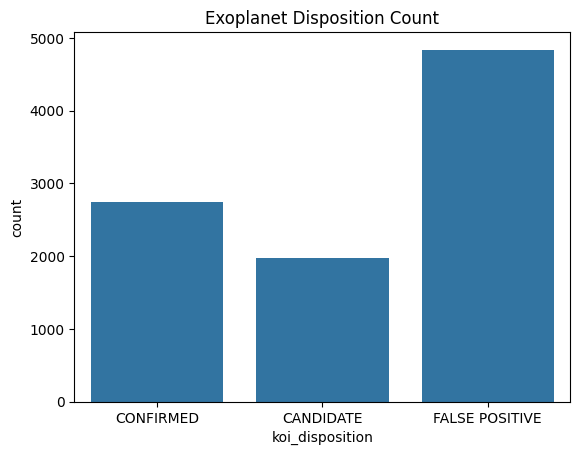

In [32]:
# Check class distribution
sns.countplot(x='koi_disposition', data=data)
plt.title("Exoplanet Disposition Count")
plt.show()

/tmp/ipython-input-3026492162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="koi_disposition", y="koi_score", palette="magma")


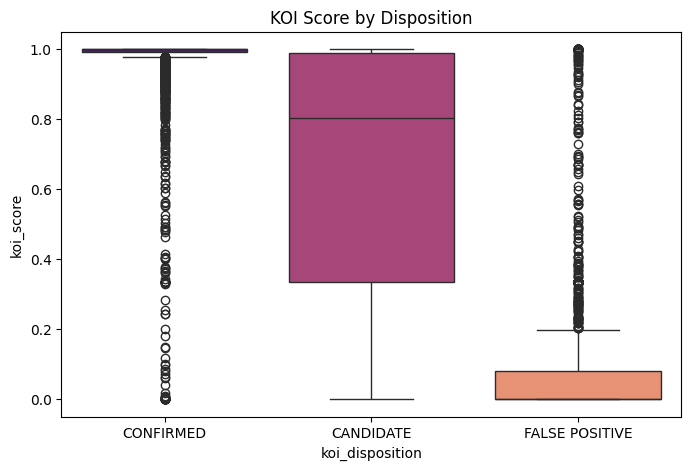

/tmp/ipython-input-3026492162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="koi_disposition", y="koi_prad", palette="cubehelix")


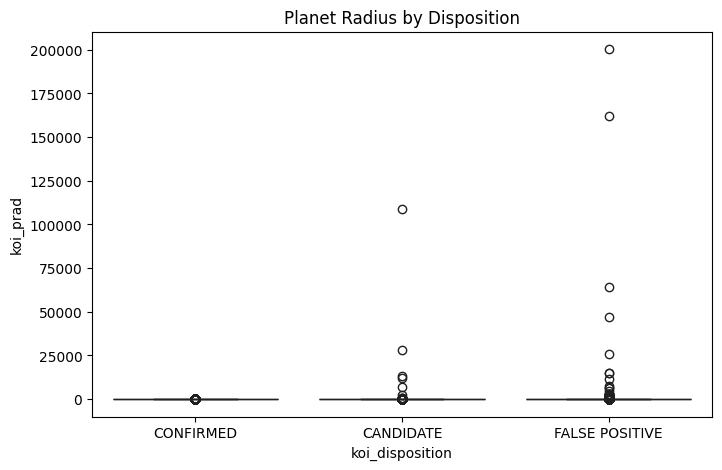

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x="koi_disposition", y="koi_score", palette="magma")
plt.title("KOI Score by Disposition")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=data, x="koi_disposition", y="koi_prad", palette="cubehelix")
plt.title("Planet Radius by Disposition")
plt.show()


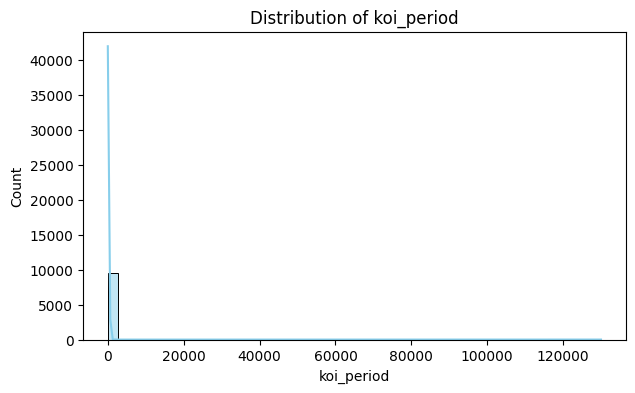

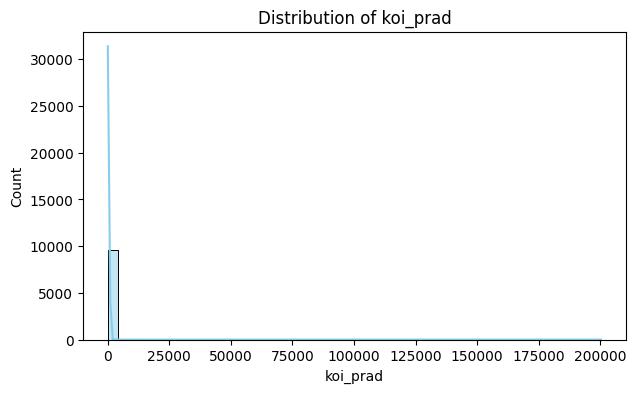

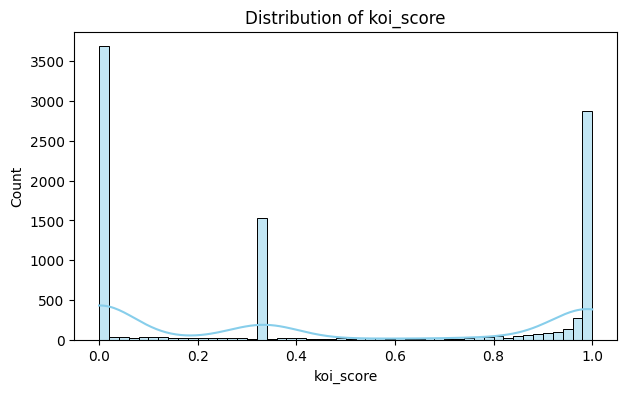

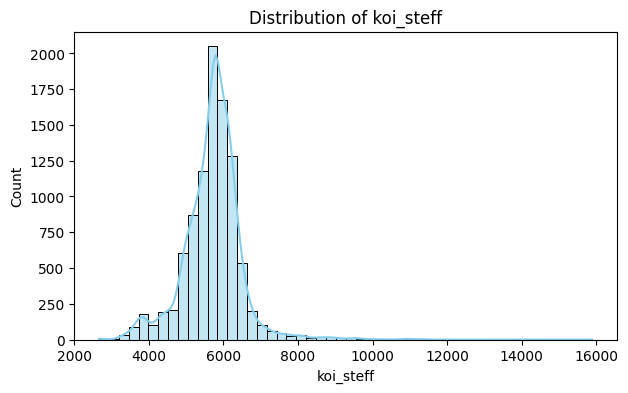

In [35]:
important_features = ["koi_period", "koi_prad", "koi_score", "koi_steff"]

for feature in important_features:
    plt.figure(figsize=(7,4))
    sns.histplot(data[feature], bins=50, kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.show()

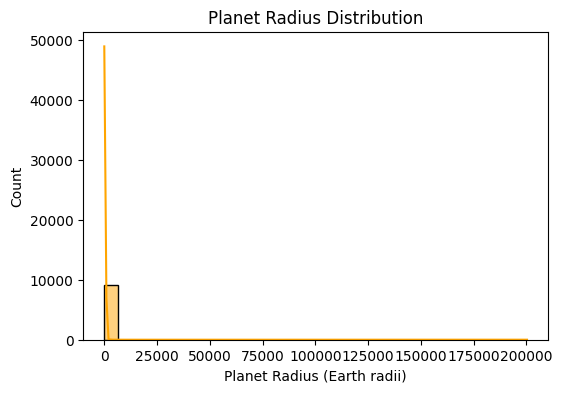

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data['koi_prad'].dropna(), bins=30, kde=True, color='orange')
plt.title('Planet Radius Distribution')
plt.xlabel('Planet Radius (Earth radii)')
plt.ylabel('Count')
plt.show()


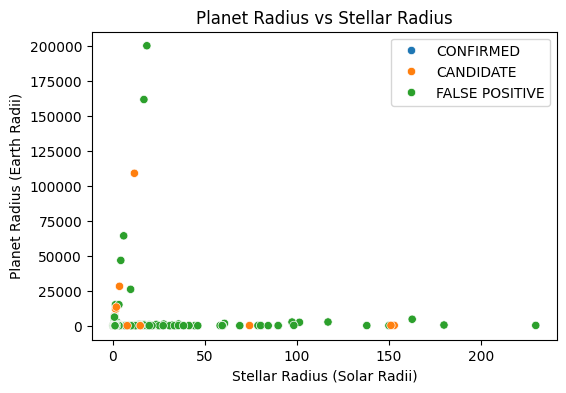

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='koi_srad', y='koi_prad', hue='koi_disposition', data=data)
plt.title('Planet Radius vs Stellar Radius')
plt.xlabel('Stellar Radius (Solar Radii)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.legend()
plt.show()


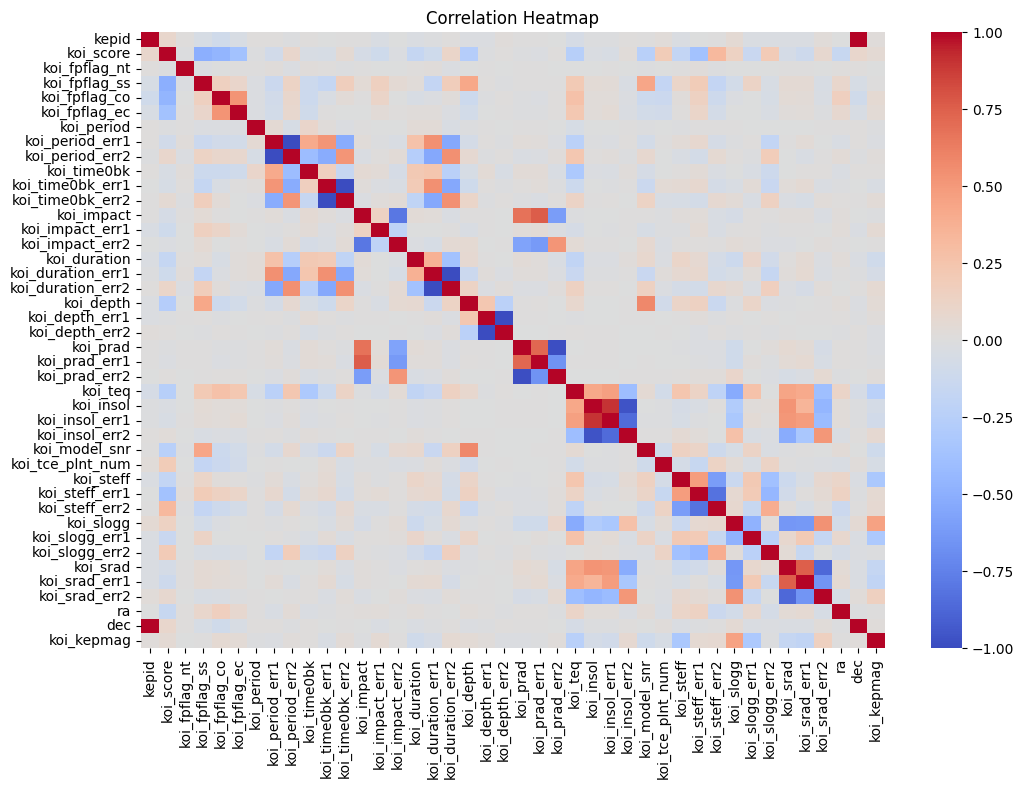

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Define target & features
# -------------------------------
target_col = "koi_disposition"   # Confirmed / Candidate / False Positive
X = data.drop(columns=[target_col])
y = data[target_col]


In [39]:

# -------------------------------
# 2. Encode target labels
# -------------------------------
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Example: Confirmed=0, Candidate=1, False Positive=2

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)



In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
rf = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=None,     # let trees grow fully
    random_state=42,
    class_weight="balanced"   # handle class imbalance
)
rf.fit(X_train, y_train)





RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [42]:
y_pred = rf.predict(X_test)

Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.85      0.77      0.81       396
     CONFIRMED       0.89      0.90      0.89       549
FALSE POSITIVE       0.97      1.00      0.99       968

      accuracy                           0.92      1913
     macro avg       0.90      0.89      0.90      1913
  weighted avg       0.92      0.92      0.92      1913



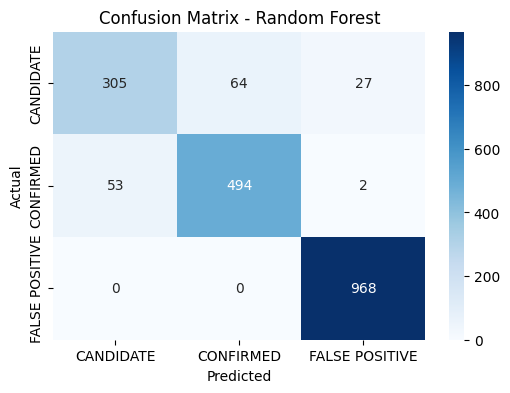

/tmp/ipython-input-1734562244.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="viridis")


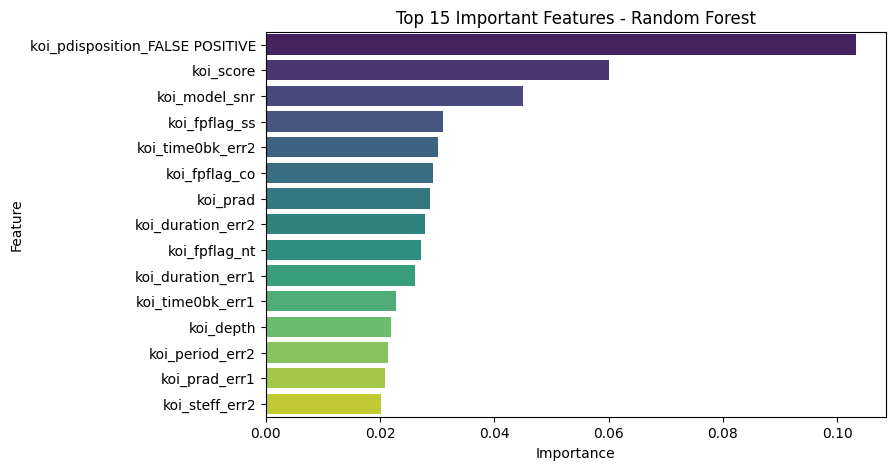

In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# -------------------------------
# 7. Feature Importance
# -------------------------------
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Important Features - Random Forest")
plt.show()